<div style="text-align: right"> 06.12.2019</div>

***Name:*** 

# Hausaufgabe Blatt 7

## Pendel: Energie

In dieser Aufgabe werden wir erneut die Bewegungsgleichung eines Pendels numerisch lösen und dabei dieses mal die Energie des Systems betrachten. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Die nach dem Euler Verfahren diskretisierte Gleichungen lauten:

\begin{align*}
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{1} \\
        \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + 
        \omega\left(t\right) \cdot \Delta t \tag{2}
\end{align*}

Die potentielle Energie $E_p$ und die kinetische Energie $E_{kin}$ sind gegeben durch:
\begin{align*}
E_p &= m \cdot g \cdot L \left( 1 - \cos \varphi \right) \\
E_{kin} &= \frac{m}{2} v^2 = \frac{m}{2}L^2 \dot \varphi ^2
\end{align*}

Die konstante Gesamtenergie ist durch die potentielle Energie bei anfänglicher Auslenkung $\varphi_0$ gegeben
\begin{align*}
E = m \cdot g \cdot L\left(1-\cos \varphi_0\right). \tag{3}
\end{align*}



### 1. Numerische Integration
Auf Blatt 6 haben Sie die Pendelgleichungen (1 + 2) numerisch integriert. Der Code dafür steht in der folgenden Zelle. Führen Sie diesen aus, bevor Sie bei "2. Energie" weiterarbeiten. Hier haben wir $N=2000$ Zeitschritte, wobei $\Delta t=0.004$, $\omega(t=0)=0$ und $\varphi_0 = \varphi(t=0)=\pi/4$ sein soll. Die Länge des Pendels ist $L=1$, die Masse $m=1$ und $g$ die Erdbeschleunigung.  


In [1]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 2000 # Anzahl Zeitschritte

dt = 0.004 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N+1) # Zeit
resultsw = [0] # Liste für berechnete Winkelgeschwindigkeit
resultsphi = [np.pi/4] # Liste für berechnete Winkel


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    wtemp = w # Zwischenspeichern der Winkelgeschwindigkeit, damit phi nicht mit dem aktualisierten omega berechnet wird
    w = w - g/L*np.sin(phi)*dt # update omage
    resultsw.append(w) # speichere omega
    phi = phi+wtemp*dt # update phi
    resultsphi.append(phi) # speichere phi

## 2. Energie
**a)** Schreiben Sie eine Funktion, die Ihnen die potentielle, kinetische und gesamte Energie abhängig vom Winkel $\varphi$ und der Winkelgeschwindigkeit $\omega$ berechnet und zurück gibt.

In [2]:
# Funktion für potentielle Energie
def epot(m = m, g = g, L = L, phi = 0):
    return (1 - np.cos(phi)) * m * g * L # m * g * h mit h = -L * cos(phi)
# Funktion für kinetische Energie
def ekin(m = m, L = L, w = 0):
    return 0.5 * m * (L * w)**2 # 1/2 m v^2 mit v = L * dphi 

**b)** Plotten Sie die kinetische, potentielle und gesamte Energie gegen die Zeit. Vergleichen Sie das Ergebnis mit der erwarteten gesamten Energie (Gleichung (3)). Warum sehen Sie eine Abweichung?

Benutzen Sie zum plotten einer horizontalen Linie `ax.hlines(value, xStart, xEnd)`, wobei `value` der y-Wert und `xStart` und `xEnd` die Anfangs- und End-Punkte der Linie sind.

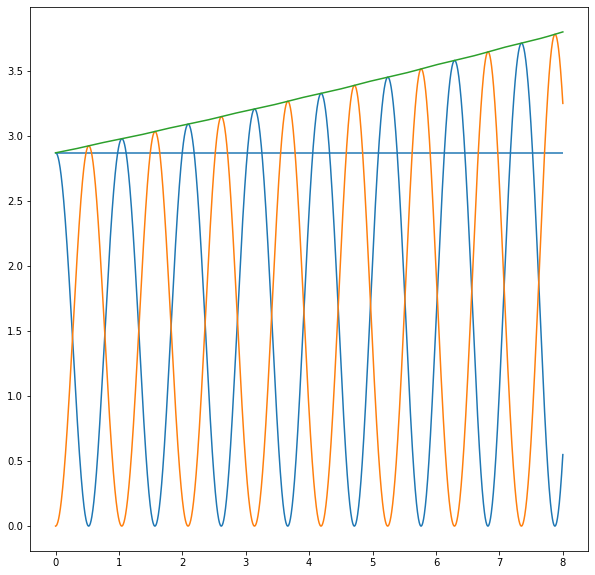

In [3]:
# plot-bibliothek importieren
import matplotlib.pyplot as plt
# plot initialisieren
plt.figure(figsize=[10, 10])
# Achsenbeschriftungen
plt.ylabel("Energie")
plt.xlabel("Zeit")
# Potentielle Energie plotten
plt.plot(t, epot(phi = resultsphi), label="Potentielle Energie")
# Kinetische Energie plotten
plt.plot(t, ekin(w = np.array(resultsw)), label="Kinetische Energie")
# Gesamtenergie (Summe aus kinetischer und Potentieller Energie) plotten
plt.plot(t, epot(phi = resultsphi) + ekin(w = np.array(resultsw)), label="Gesamtenergie")
# Erwartete Gesamtenergie berechnen
eges = m * g * L * (1 - np.cos(resultsphi[0]))
plt.hlines(eges, 0, dt * N, label="Erwartete Gesamtenergie")
# Legende
plt.legend()
# Plot anzeigen
plt.show()

Die Gesamtenergie, die aus dem Ergebnis der Euler-Integration hervorgeht, ist nicht konstant. Das kommt daher, dass die genutzten Werte von $\varphi$ und $\omega$ für jeden Schritt eigentlich schon veraltet sind, da einfach die letzten Werte genutzt werden. Daher müsste der Effekt mit kleineren Zeitschritten kleiner werden:

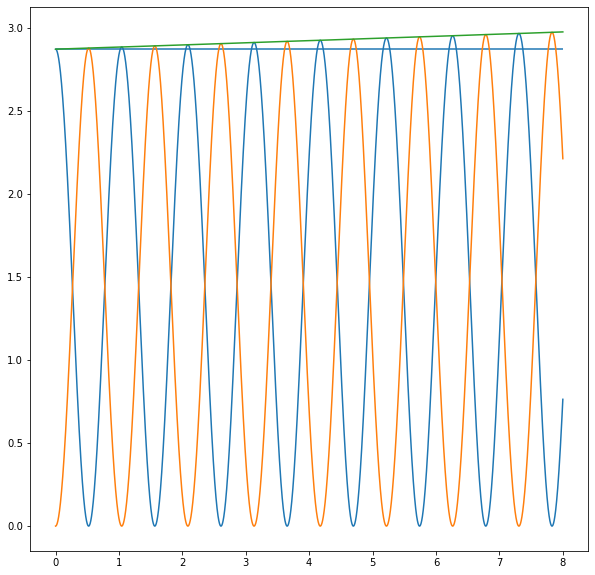

In [5]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 16000 # Anzahl Zeitschritte

dt = 0.0005 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N+1) # Zeit
resultsw = [0] # Liste für berechnete Winkelgeschwindigkeit
resultsphi = [np.pi/4] # Liste für berechnete Winkel


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    wtemp = w # Zwischenspeichern der Winkelgeschwindigkeit, damit phi nicht mit dem aktualisierten omega berechnet wird
    w = w - g/L*np.sin(phi)*dt # update omage
    resultsw.append(w) # speichere omega
    phi = phi+wtemp*dt # update phi
    resultsphi.append(phi) # speichere phi
# Funktion für potentielle Energie
def epot(m = m, g = g, L = L, phi = 0):
    return (1 - np.cos(phi)) * m * g * L # m * g * h mit h = -L * cos(phi)
# Funktion für kinetische Energie
def ekin(m = m, L = L, w = 0):
    return 0.5 * m * (L * w)**2 # 1/2 m v^2 mit v = L * dphi 
# plot-bibliothek importieren
import matplotlib.pyplot as plt
# plot initialisieren
plt.figure(figsize=[10, 10])
# Achsenbeschriftungen
plt.ylabel("Energie")
plt.xlabel("Zeit")
# Potentielle Energie plotten
plt.plot(t, epot(phi = resultsphi), label="Potentielle Energie")
# Kinetische Energie plotten
plt.plot(t, ekin(w = np.array(resultsw)), label="Kinetische Energie")
# Gesamtenergie (Summe aus kinetischer und Potentieller Energie) plotten
plt.plot(t, epot(phi = resultsphi) + ekin(w = np.array(resultsw)), label="Gesamtenergie")
# Erwartete Gesamtenergie berechnen
eges = m * g * L * (1 - np.cos(resultsphi[0]))
plt.hlines(eges, 0, dt * N, label="Erwartete Gesamtenergie")

# Plot anzeigen
plt.show()